- クラスタリングの手法について調べたこと
- 実際のコードについてまとめるようノートブック

# ハードクラスタリング
- k-means
- DBSCAN

# ソフトクラスタリング
- c-means
- GMM

## k-means
- ハードクラスタリング
- 教師無しで分類できる
- 非階層的クラスタリング

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# irisのデータセットをクラスタリングしてみる
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
# 先頭4つの特徴量を用いて学習
kmeans_model = KMeans(n_clusters=3, random_state=10).fit(df.iloc[:, 0:4])

# 分類結果のラベルを取得する
labels = kmeans_model.labels_

In [17]:
df["cluster"] = labels
df["cluster"].value_counts()

1    62
0    50
2    38
Name: cluster, dtype: int64

## DBSCAN
- ハードクラスタリング
- 密度準拠
- -1がノイズ(どこにも属さないものとして色別される)
- パラメータ eps(ε)、minPts

In [3]:
from sklearn.cluster import DBSCAN

In [6]:
df = sns.load_dataset("iris")

db = DBSCAN().fit(df.iloc[:,0:4])
labels = db.labels_

In [7]:
df["cluster"] = labels
df["cluster"].value_counts()

 1    84
 0    49
-1    17
Name: cluster, dtype: int64

# 階層型クラスタリング

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram

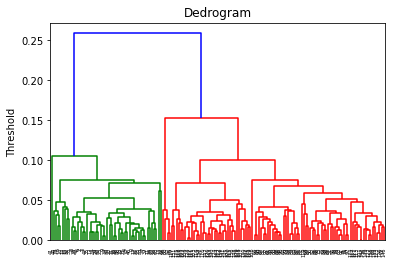

In [12]:
result1 = linkage(df.iloc[:, 0:4], 
                  metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  method = 'average')
                  #method= 'complete')
                  #method='weighted')
dendrogram(result1)
plt.title("Dedrogram")
plt.ylabel("Threshold")
plt.show()


# ネットワーククラスタリング
- ノードに見立ててクラスタリングを実施する
- 割と有用そうなので、しっかり勉強したい